## Task assignment policies for server farms


Jobs arrive according to Poisson process with mean $\frac{1}{\lambda}$. Job sizes distributed according to some high variability distribution G with mean $\frac{1}{\mu}$.

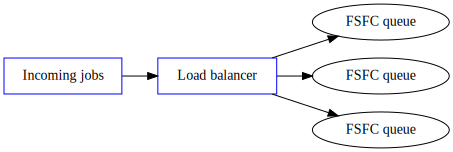

In [2]:
from graphviz import Digraph

dot = Digraph(graph_attr={"rankdir": "LR"})
dot.node(name="input", label="Incoming jobs", shape="box", color="blue")
dot.node(name="lb", label="Load balancer", shape="box", color="blue")
dot.node(name="q1", label="FSFC queue")
dot.node(name="q2", label="FSFC queue")
dot.node(name="q3", label="FSFC queue")


dot.edge("input", "lb")
dot.edge("lb", "q1")
dot.edge("lb", "q2")
dot.edge("lb", "q3")
dot

**RANDOM** policy - each job assigned to one of the k hosts with equal probability. This policy aims to equalize the expected number of jobs at each host

**ROUND-ROBING** policy - jobs assigned to hosts in a cyclical fashion with the ith job being assigned to host number (i mod k) + 1. This policy aims to equalize the expected number of jobs at each host

**JSQ (Join-the-Shortest-Queue)** - each incoming job is assigned to the host that has the shortest queue. This policy tries to equalize the instantaneous number of jobs at each host

**LWL (Least-Work-Left)*** - each job goes to the queue where it will achive the lowest possible response time. Unlike previous policies that aim to equalize jobs at each host, LWL policy aim to equalize the total work at each host.

**SITA (Size-Interval-Task-Assignment)** - Small jobs go to host 1, mediums to host 2, larges to host 3 etc.

**M/G/k** - single central queue for k servers. Each host when free pick the job at the head of the queue to run.

Compare policies by mean response time.

### RANDOM worse than ROUND-ROBIN

RANDOM is a Poisson process by  Poisson splitting, ROUND-ROBBING is a Erlang-k process. The lower variability of E_k results in RR having lower mean response time

### ROUND-ROBIN worse than JSQ

JSQ can react quickly. If one queue became empty then JSQ send jobs to this queue faster than RR. JSQ is **dynamic** (adapts based on changes in the state of the system) whereas ROUND-ROBING is **static**.


### JSQ worse than M/G/k

Both M/G/k and JSQ are dynamic policies. M/G/k holds off assigning jobs to hosts as long as possible. In JSQ it is still possible when one queue became empty, that never happens in M/G/k. M/G/k can outperform JSQ by an order of magnitude with respect to mean when job size variability is high.


### LWL equal to M/G/k

In M/G/k system job will eventually goes to is exactly the host that had the least work in front of it under LWL.


### SITA vs LWL

Sometimes SITA better than LWL, sometimes LWL better than SITA.

LWL is ideal at keeping servers utilized.
SITA is ideally suited to reducing variability at each queue.

Finding cutoffs in SITA is very counterintuitive and often severly unbalancing the load between servers.


### PS server farms

$$E[T]^{RANDOM} = E[T]^{SITA}$$

JSQ better LWL better ROUND_ROBIN better RANDOM